In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
users_data = dict()
for user in os.listdir("FaceEngageDataset/"):
    valence = []
    arousal = []
    for segment in os.listdir(f"FaceEngageDataset/{user}"):
        if not segment.endswith("pkl"):
            continue
        data = pickle.load(open(f"FaceEngageDataset/{user}/{segment}", "rb"))
        valence.append(data["Valence"])
        arousal.append(data["Arousal"])
    users_data[user] = {"valence": valence, "arousal": arousal}

In [7]:
def plot_time_vs_metric(metric):
    users = [u for u, v in users_data.items() if len(v[metric])]
    n = len(users)
    ncols = 3
    nrows = int(np.ceil(n/ncols))
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True, figsize=(16, 9))
    
    for i, u in enumerate(users):
        df = pd.DataFrame(users_data[u][metric])
        mean = df.mean()
        std = df.std()
        
        ax = axs.flat[i]
        ax.plot(mean)
        ax.fill_between(x=df.columns, y1=mean+std, y2=mean-std, alpha=0.1)
        ax.set_title(f"{metric} of user {u}".title())
        
    return fig

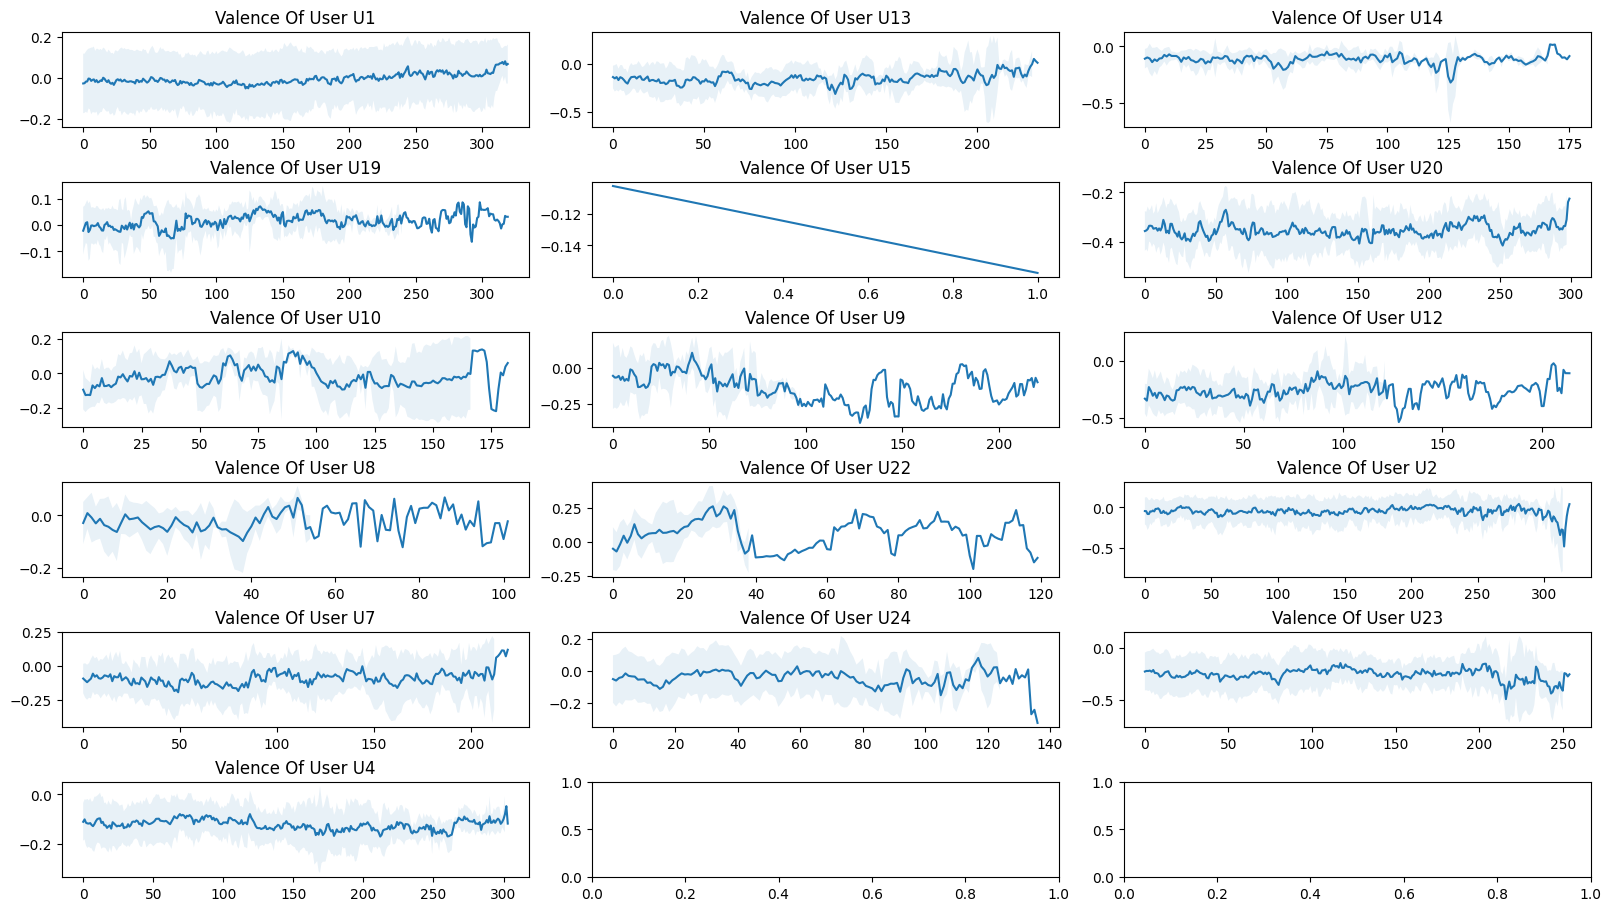

In [8]:
plot_time_vs_metric("valence");

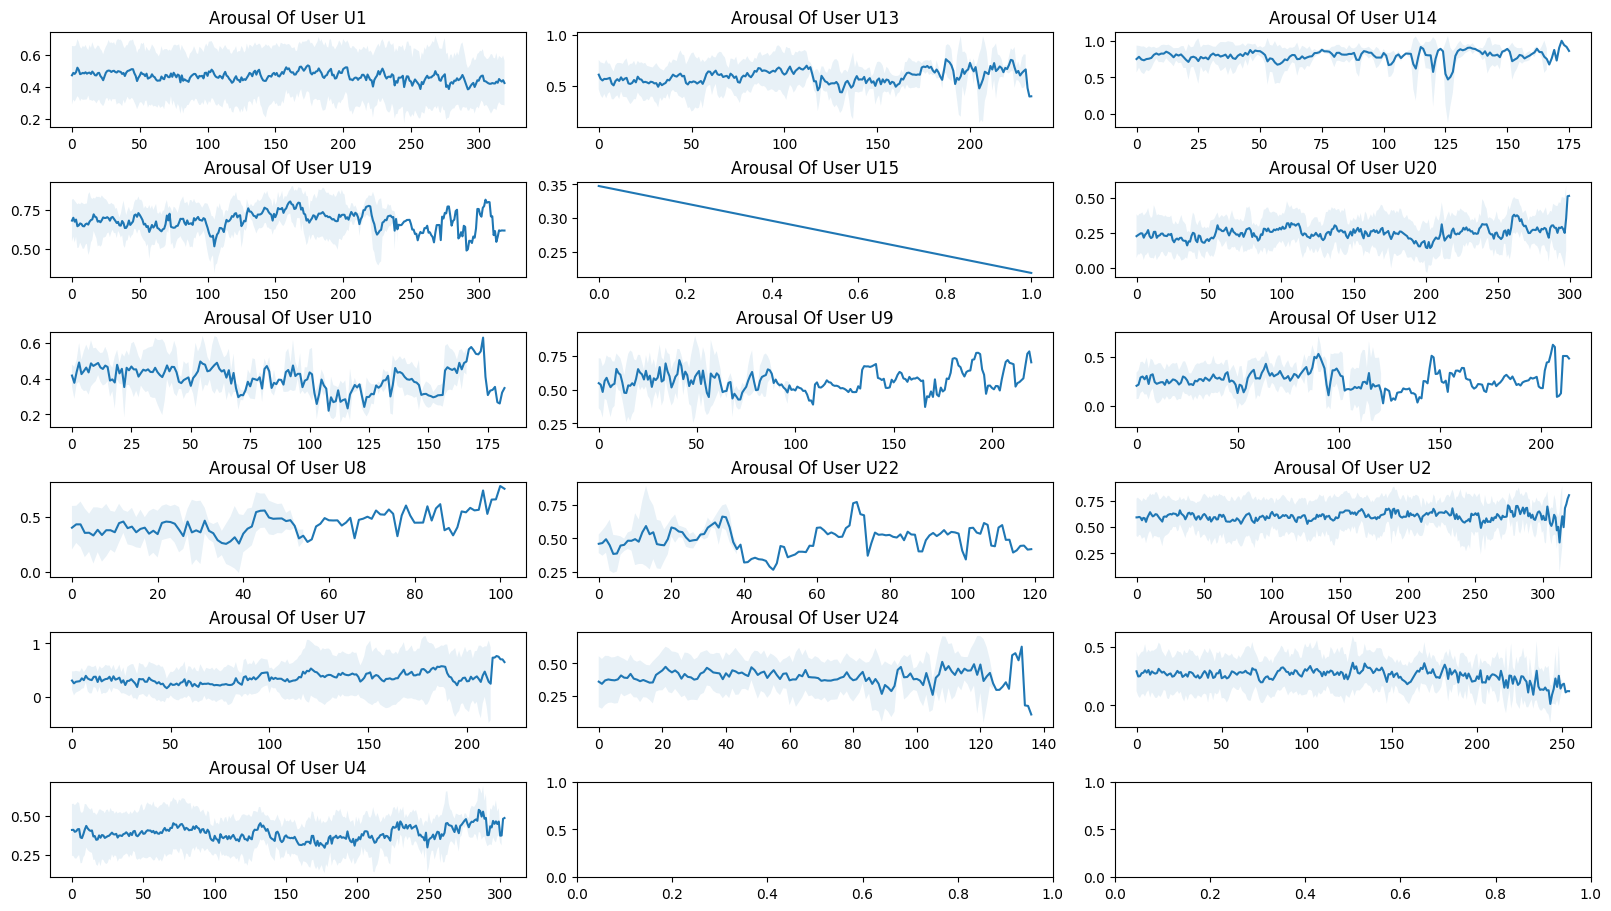

In [9]:
plot_time_vs_metric("arousal");